# Week 6 Mini project 

  - ### World Development Indicators Data Set
  
  
---
---

### Import modules
<li><b>pandas</b> and <b>numpy</b> for data ingestion and manipulation.</li>
<li><b>matplotlib</b> for data visualization</li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
# Step 1: Acquire Data
- [x] Imported dataset from kaggle (https://www.kaggle.com/worldbank/world-development-indicators)
- [x] Retrieve dataset from the csv file

In [2]:
data = pd.read_csv('./Indicators.csv')
data.shape

(5656458, 6)

There is a lot of data - **5,656,458 rows** and 6 columns

- What are the 6 columns called?

In [3]:
for column in data.columns:
    print(column)

CountryName
CountryCode
IndicatorName
IndicatorCode
Year
Value


- What does the data look like?

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


## Step 1-B: Query data

Country name and country code are pairs. Indicator name and code are pairs. "Years" is easy enough to understand. Values are difficult to understand without context.

  - How many countries are there?
  - How many indicators are there?
  - What years does the data cover?

#### Question: How many countries are there?

In [5]:
countries = data['CountryName'].unique().tolist()
print(f"\nThere are {len(countries)} countries in the data set")


There are 247 countries in the data set


#### Question: How many different indicators are there?

In [6]:
indicators = data['IndicatorName'].unique().tolist()
print(f"There are {len(indicators)} indicators")

There are 1344 indicators


#### Question: How many years of data are there?

In [7]:
years = data['Year'].unique().tolist()
print(f"There are {len(years)} years of data available spanning from {min(years)} to {max(years)}")

There are 56 years of data available spanning from 1960 to 2015


---
# Step 2: Prepare Data
## Step 2-A: Explore
- [x] Do a preliminary analysis
- [x] Understand the nature of your data

**Goal** = Understand your data

- [x] Find correlations (scatter chart)
- [x] Find general trends (bar/line chart)
- [x] Find outliers *- (Found for life expectancy)*

**Describe** your data

- [x] Mean
- [x] Median
- [x] Mode
- [x] Range
- [x] Standard deviation

**Visualise** your data

### Preliminary analysis: What are the most common indicators if any?

In [8]:
indicators_series = data['IndicatorName'].value_counts()
print(indicators_series.head(10)) # 60 was the number I used when deciding which ones looked interesting

Population, total                           13484
Population growth (annual %)                13442
Urban population (% of total)               13415
Rural population (% of total population)    13415
Rural population                            13374
Urban population                            13374
Urban population growth (annual %)          13337
Surface area (sq. km)                       13090
Land area (sq. km)                          13086
Rural population growth (annual %)          13061
Name: IndicatorName, dtype: int64


### I'm interested in the following indicators

- *GDP per capita (current US$)*
- *Life expectancy at birth, total (years)*
- *Adolescent fertility rate (births per 1,000 women ages 15-19)*
- *Birth rate, crude (per 1,000 people)*
- *Permanent cropland (% of land area)*
- *Land area (sq. km)*
- *Population density (people per sq. km of land area)* 

In [9]:
wanted_indicators = [
    "GDP per capita \(current US",
    "Life expectancy at birth, total \(years",
    "Adolescent fertility rate \(births per 1,000 women ages 15-19",
    "Birth rate, crude \(per 1,000 people",
    "Permanent cropland \(% of land area",
    "Land area \(sq. km",
    "Population density \(people per sq. km of land area"
]

### Use it to make filters to show only the data I want

In [10]:
filter1 = data['IndicatorName'].str.contains(wanted_indicators[0]) # GDP
filter2 = data['IndicatorName'].str.contains(wanted_indicators[1]) # Life expectancy
filter3 = data['IndicatorName'].str.contains(wanted_indicators[2]) # teen birth rate
filter4 = data['IndicatorName'].str.contains(wanted_indicators[3]) # birth rate
filter5 = data['IndicatorName'].str.contains(wanted_indicators[4]) # cropland
filter6 = data['IndicatorName'].str.contains(wanted_indicators[5]) # land
filter7 = data['IndicatorName'].str.contains(wanted_indicators[6]) # pop density

### Make a dataframe for each factor I want to look at

In [11]:
GDP_indicator = wanted_indicators[0] # GDP per capita (current US$)
GDP_filter = data['IndicatorName'].str.contains(GDP_indicator)
GDP_filtered_df = data[GDP_filter]

LE_indicator = wanted_indicators[1] # Life expectancy
LE_filter = data['IndicatorName'].str.contains(LE_indicator)
LE_filtered_df = data[LE_filter]

teen_BR_indicator = wanted_indicators[2] # Adolescent fertility rate (births per 1,000 women ages 15-19)
teen_BR_filter = data['IndicatorName'].str.contains(teen_BR_indicator)
teen_BR_filtered_df = data[teen_BR_filter]

BR_indicator = wanted_indicators[3] # Birth rate
BR_filter = data['IndicatorName'].str.contains(BR_indicator)
BR_filtered_df = data[BR_filter]

crop_indicator = wanted_indicators[4] # Cropland
crop_filter = data['IndicatorName'].str.contains(crop_indicator)
crop_filtered_df = data[crop_filter]

land_indicator = wanted_indicators[5] # land
land_filter = data['IndicatorName'].str.contains(land_indicator)
land_filtered_df = data[land_filter]

pop_dens_indicator = wanted_indicators[6] # population density
pop_dens_filter = data['IndicatorName'].str.contains(pop_dens_indicator)
pop_dens_filtered_df = data[pop_dens_filter]

**NOTE**: Cropland, land and population density data starts at **1961** not 1960. 

Certain data visualisations will require Null data to be dropped first (box plot)

### Simplify each dataframa to include only the country, year and factor
I'm not interested in the country code because I already have the country name for my purposes. I'm also getting rid of the indicator code/name because I'll be adding the specific indicators I want.

I'll then rename the columns in each mini dataframe to be the same two columns (CountryName and Year) and then the third column will be the specific indicator. This will also make it easier to search for later.

In [12]:
del GDP_filtered_df["CountryCode"]
del GDP_filtered_df["IndicatorCode"]
del GDP_filtered_df["IndicatorName"]
GDP_filtered_df.columns = ['CountryName', 'Year', "GDP"]

del LE_filtered_df["CountryCode"]
del LE_filtered_df["IndicatorCode"]
del LE_filtered_df["IndicatorName"]
LE_filtered_df.columns = ['CountryName', 'Year', "LifeExpectancy"]

del teen_BR_filtered_df["CountryCode"]
del teen_BR_filtered_df["IndicatorCode"]
del teen_BR_filtered_df["IndicatorName"]
teen_BR_filtered_df.columns = ['CountryName', 'Year', "TeenBirthRate"]

del BR_filtered_df["CountryCode"]
del BR_filtered_df["IndicatorCode"]
del BR_filtered_df["IndicatorName"]
BR_filtered_df.columns = ['CountryName', 'Year', "BirthRate"]

del crop_filtered_df["CountryCode"]
del crop_filtered_df["IndicatorCode"]
del crop_filtered_df["IndicatorName"]
crop_filtered_df.columns = ['CountryName', 'Year', "Cropland%"]

del land_filtered_df["CountryCode"]
del land_filtered_df["IndicatorCode"]
del land_filtered_df["IndicatorName"]
land_filtered_df.columns = ['CountryName', 'Year', "LandArea"]

del pop_dens_filtered_df["CountryCode"]
del pop_dens_filtered_df["IndicatorCode"]
del pop_dens_filtered_df["IndicatorName"]
pop_dens_filtered_df.columns = ['CountryName', 'Year', "PopulationDensity"]

An example of one of my mini dataframes. You can see that there's the three columns I want.

In [13]:
GDP_filtered_df.head(3)

,CountryName,Year,GDP
95,Caribbean small states,1960,457.464712
264,East Asia & Pacific (all income levels),1960,146.814138
377,East Asia & Pacific (developing only),1960,89.319639


### Concatonate all mini dataframes into one big one

It adds indicator columns according to the year and the country name. That means I'll have 9 columns in total. It's also a lot shorter than my original dataframe because it only has one row per country/year combination, as opposed to country/year/indicator combination. This will greatly reduce the processing times!

In [14]:
selected_data_df = GDP_filtered_df
selected_data_df = selected_data_df.merge(LE_filtered_df, on=["CountryName", "Year"], how="left", left_index=True)
selected_data_df = selected_data_df.merge(teen_BR_filtered_df, on=["CountryName", "Year"], how="left", left_index=True)
selected_data_df = selected_data_df.merge(BR_filtered_df, on=["CountryName", "Year"], how="left", left_index=True)
selected_data_df = selected_data_df.merge(crop_filtered_df, on=["CountryName", "Year"], how="left", left_index=True)
selected_data_df = selected_data_df.merge(land_filtered_df, on=["CountryName", "Year"], how="left", left_index=True)
selected_data_df = selected_data_df.merge(pop_dens_filtered_df, on=["CountryName", "Year"], how="left", left_index=True)
selected_data_df.reset_index(inplace=True)
del selected_data_df["index"]
selected_data_df

,CountryName,Year,GDP,LifeExpectancy,TeenBirthRate,BirthRate,Cropland%,LandArea,PopulationDensity
0,Caribbean small states,1960,457.464712,62.271795,162.871212,40.017001,NaN,NaN,NaN
1,East Asia & Pacific (all income levels),1960,146.814138,48.298317,66.015974,26.362350,NaN,NaN,NaN
2,East Asia & Pacific (developing only),1960,89.319639,45.549658,75.043631,26.635950,NaN,NaN,NaN
3,Euro area,1960,924.571393,69.273711,27.301838,18.838713,NaN,NaN,NaN
4,Europe & Central Asia (all income levels),1960,648.223441,67.030027,42.030052,22.141599,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10338,Vanuatu,2014,3147.963779,NaN,43.434200,NaN,NaN,12190.0,21.237326
10339,Vietnam,2014,2052.294202,NaN,38.119400,NaN,NaN,310070.0,292.611346
10340,West Bank and Gaza,2014,2965.903675,NaN,59.142200,NaN,NaN,6020.0,713.402326
10341,Zambia,2014,1721.623274,NaN,93.015600,NaN,NaN,743390.0,21.148177


It only has 10343 rows - way fewer than the 5.5 million we had earlier!!

**Describe** your data

- [x] Mean
- [x] Median
- [x] Mode
- [x] Range
- [x] Standard deviation

In [15]:
selected_data_df.describe()

,Year,GDP,LifeExpectancy,TeenBirthRate,BirthRate,Cropland%,LandArea,PopulationDensity
count,10343.000000,10343.000000,9759.000000,9887.000000,9898.000000,9341.000000,1.011800e+04,10118.000000
mean,1990.078120,6835.186145,64.068598,77.457258,28.673934,3.558564,4.471696e+06,276.950579
std,15.306369,13637.305804,11.019995,53.710495,12.828648,6.667354,1.380100e+07,1492.697235
min,1960.000000,35.367727,27.078902,1.658400,6.900000,0.000644,2.000000e+00,0.135792
25%,1978.000000,460.052926,56.128610,31.347870,16.983830,0.330826,2.812000e+04,17.815694
50%,1992.000000,1595.831082,67.023073,67.785600,27.982500,1.007109,2.457200e+05,46.289187
75%,2003.000000,6197.504088,72.641220,114.533651,40.108500,3.841131,1.220190e+06,120.451167
max,2014.000000,193648.132213,83.831707,231.186000,57.637000,66.666667,1.298221e+08,21595.350000


In all honesty I don't really know how to interpret this. One thing I noticed is that the mean Teen Birth Rate is significantly higher than the mean Birth Rate. I thought that this could be due to measurement differences (not bothering measuring it if they don't care about it) except that the counts for both are very similar (only 11 missing data points). Very interesting.

It could be interesting to look into the outliers. Which country is 2/3 cropland? Where is the highest life expectancy? Which country has the highest GDP?

In [16]:
corr = selected_data_df.corr()
corr

,Year,GDP,LifeExpectancy,TeenBirthRate,BirthRate,Cropland%,LandArea,PopulationDensity
Year,1.000000,0.325817,0.420501,-0.368044,-0.418084,0.088459,-0.043036,0.043859
GDP,0.325817,1.000000,0.524861,-0.459438,-0.509476,-0.110780,-0.026678,0.331829
LifeExpectancy,0.420501,0.524861,1.000000,-0.800267,-0.884009,0.078543,0.010561,0.148371
TeenBirthRate,-0.368044,-0.459438,-0.800267,1.000000,0.849747,-0.116922,-0.065969,-0.158239
BirthRate,-0.418084,-0.509476,-0.884009,0.849747,1.000000,-0.017482,-0.057000,-0.145785
Cropland%,0.088459,-0.110780,0.078543,-0.116922,-0.017482,1.000000,-0.124269,0.061981
LandArea,-0.043036,-0.026678,0.010561,-0.065969,-0.057000,-0.124269,1.000000,-0.051256
PopulationDensity,0.043859,0.331829,0.148371,-0.158239,-0.145785,0.061981,-0.051256,1.000000


This is a huge mess of numbers and decimal points which was confusing to look at so I made a function to help me scan the table to identify interesting correlations

In [17]:
def correlation_description(corr_coeff):
    if abs(corr_coeff) < 0.1:
        return "No correlation\t"
    elif abs(corr_coeff) < 0.3:
        return "Weak correlation"
    elif abs(corr_coeff) < 0.5:
        return "Moderate correlation"
    elif abs(corr_coeff) < 1:
        return "Strong correlation"
    else:
        return "Error: coefficient = 1"

def find_correlations(df, corr_coeff=0.5, highlight_level="N/A"):
    """Takes a data frame and print the combinations of factors with a correlation coefficient a strength or higher"""
    for key, value in df.iteritems(): 
        for item in value:
            if abs(item) >= corr_coeff and abs(item) != 1:
                corr_str = round(item,2)
                corr_level = correlation_description(corr_str)
                if highlight_level.lower() in corr_level.lower():
                    highlight = "!!!"
                else:
                    highlight = "  "
                factor1 = key
                factor2 = value.index[pd.Index(value).get_loc(item)]
                print(f"{corr_level}:\t{corr_str} \t{highlight}\t{factor1}  and  {factor2}")
        print() 

First, I want to look at all the data and assign a correlation strength to it but I want to focus on which factors have no correlations so that I can potentially disregard them

In [18]:
find_correlations(corr, 0.01, highlight_level="no") 
# aka show all combinations and highlight the no correlation ones

Moderate correlation:	0.33 	  	Year  and  GDP
Moderate correlation:	0.42 	  	Year  and  LifeExpectancy
Moderate correlation:	-0.37 	  	Year  and  TeenBirthRate
Moderate correlation:	-0.42 	  	Year  and  BirthRate
No correlation	:	0.09 	!!!	Year  and  Cropland%
No correlation	:	-0.04 	!!!	Year  and  LandArea
No correlation	:	0.04 	!!!	Year  and  PopulationDensity

Moderate correlation:	0.33 	  	GDP  and  Year
Strong correlation:	0.52 	  	GDP  and  LifeExpectancy
Moderate correlation:	-0.46 	  	GDP  and  TeenBirthRate
Strong correlation:	-0.51 	  	GDP  and  BirthRate
Weak correlation:	-0.11 	  	GDP  and  Cropland%
No correlation	:	-0.03 	!!!	GDP  and  LandArea
Moderate correlation:	0.33 	  	GDP  and  PopulationDensity

Moderate correlation:	0.42 	  	LifeExpectancy  and  Year
Strong correlation:	0.52 	  	LifeExpectancy  and  GDP
Strong correlation:	-0.8 	  	LifeExpectancy  and  TeenBirthRate
Strong correlation:	-0.88 	  	LifeExpectancy  and  BirthRate
No correlation	:	0.08 	!!!	LifeExpect

It is clear that Land Area doesn't correlate much with any of the factors that I've selected. It only has a very weak correlation with cropland%. So I can pretty much ignore than entirely. Cropland% also only has weak or no correlation. 

There is a weak correlation with GDP, Teen Birth Rate and Land Area. I had hypothesised that more rural/agricultural countries might have slightly poorer economies and have bigger families for farming but I hadn't expected the difference to be so small.

I was also surprised to see that population density was so weakly correlated with the year. I had expected that as population increased over time, the density would increase too. However, I hadn't accounted for urban growth over this time. People wouldn't remain densely packed in the same areas when there could be expansion with new towns and cities being built. 

As a result, I'm going to remove the land area and cropland columns from my data.

In [19]:
del selected_data_df["LandArea"]
del selected_data_df["Cropland%"]
selected_data_df.head(3)

,CountryName,Year,GDP,LifeExpectancy,TeenBirthRate,BirthRate,PopulationDensity
0,Caribbean small states,1960,457.464712,62.271795,162.871212,40.017001,NaN
1,East Asia & Pacific (all income levels),1960,146.814138,48.298317,66.015974,26.362350,NaN
2,East Asia & Pacific (developing only),1960,89.319639,45.549658,75.043631,26.635950,NaN


See! It's smaller now, as I wanted

In [79]:
corr = selected_data_df.corr() # reset the correlation dataframe for my smaller data size

In [80]:
find_correlations(corr, 0.01, highlight_level="weak") # now highlight the weak correlations

Moderate correlation:	0.33 	  	Year  and  GDP
Moderate correlation:	0.42 	  	Year  and  LifeExpectancy
Moderate correlation:	-0.37 	  	Year  and  TeenBirthRate
Moderate correlation:	-0.42 	  	Year  and  BirthRate
No correlation	:	0.04 	  	Year  and  PopulationDensity

Moderate correlation:	0.33 	  	GDP  and  Year
Strong correlation:	0.52 	  	GDP  and  LifeExpectancy
Moderate correlation:	-0.46 	  	GDP  and  TeenBirthRate
Strong correlation:	-0.51 	  	GDP  and  BirthRate
Moderate correlation:	0.33 	  	GDP  and  PopulationDensity

Moderate correlation:	0.42 	  	LifeExpectancy  and  Year
Strong correlation:	0.52 	  	LifeExpectancy  and  GDP
Strong correlation:	-0.8 	  	LifeExpectancy  and  TeenBirthRate
Strong correlation:	-0.88 	  	LifeExpectancy  and  BirthRate
Weak correlation:	0.15 	!!!	LifeExpectancy  and  PopulationDensity

Moderate correlation:	-0.37 	  	TeenBirthRate  and  Year
Moderate correlation:	-0.46 	  	TeenBirthRate  and  GDP
Strong correlation:	-0.8 	  	TeenBirthRate  and 

After removing the columns relating to land, it's clear that population density is the next factor with the weakest correlations. I'm not going to remove it at this point because I'm interested in the moderate correlation with GDP but I won't be exploring its relationship with other factors. 

Instead, I'm going to focus my attention of factors which have a correlation coefficient of greater than 0.5 (positive or negative)

In [81]:
find_correlations(corr) # return only the strong correlations (Default function argument)


Strong correlation:	0.52 	  	GDP  and  LifeExpectancy
Strong correlation:	-0.51 	  	GDP  and  BirthRate

Strong correlation:	0.52 	  	LifeExpectancy  and  GDP
Strong correlation:	-0.8 	  	LifeExpectancy  and  TeenBirthRate
Strong correlation:	-0.88 	  	LifeExpectancy  and  BirthRate

Strong correlation:	-0.8 	  	TeenBirthRate  and  LifeExpectancy
Strong correlation:	0.85 	  	TeenBirthRate  and  BirthRate

Strong correlation:	-0.51 	  	BirthRate  and  GDP
Strong correlation:	-0.88 	  	BirthRate  and  LifeExpectancy
Strong correlation:	0.85 	  	BirthRate  and  TeenBirthRate




Firstly, there's a little bit of redundancy. If a country has a high birth rate, it stands to reason that the teen birth rate will be similarly high so the correlation of 0.85 is to be expected. 

There is also the fact that each item in the list above is duplicated (x --> y) is the same as (y --> x). That means that the interesting relationships we have identified are as follows:

- GDP + Life Expectancy (0.52)
- GDP + Birth Rate (-0.51)
- Life Expectancy and Teen Birth Rate (-0.8)
- Life Expectancy and Birth Rate (-0.88)
- Teen Birth Rate and Birth Rate (0.85)

Now to make a **function** which will take two factors and make a quick chart as well as working out the correlation coefficient. Note: this will use all years of data

In [66]:
def initial_visualisation(factor1, factor2):
    F1 = selected_data_df[factor1].values
    F2 = selected_data_df[factor2].values
    
    temp_df = selected_data_df[[factor1, factor2]]
    temp_corr_df = temp_df.corr()
    for key, value in temp_corr_df.iteritems(): # works out the correlation
        for item in value:
            if abs(item) != 1:
                corr_str = round(item,2)

    plt.scatter(F1, F2, s=0.1)
    plt.xlabel(factor1)
    plt.ylabel(factor2)
    plt.title(f'Relationship between {factor1} and {factor2}\n(correlation = {corr_str})')
    plt.figure(figsize=(15,15))
    plt.show()
    print()

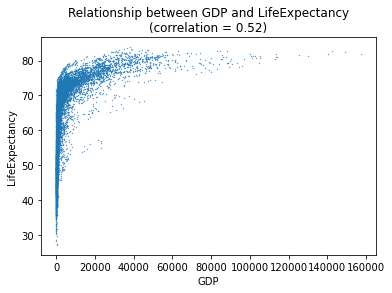

<Figure size 1080x1080 with 0 Axes>

In [68]:
initial_visualisation("GDP", "LifeExpectancy")

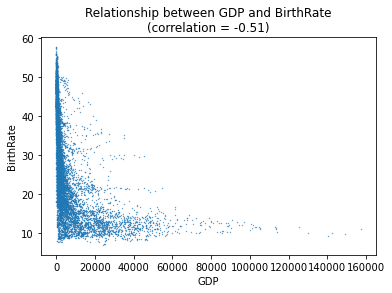

<Figure size 1080x1080 with 0 Axes>

In [69]:
initial_visualisation("GDP", "BirthRate")

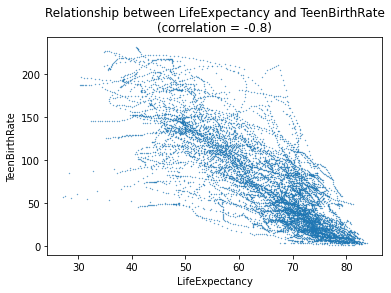

<Figure size 1080x1080 with 0 Axes>

In [70]:
initial_visualisation("LifeExpectancy", "TeenBirthRate")

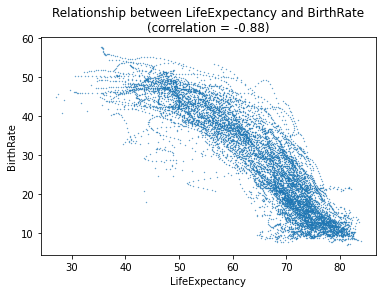

<Figure size 1080x1080 with 0 Axes>

In [71]:
initial_visualisation("LifeExpectancy", "BirthRate")

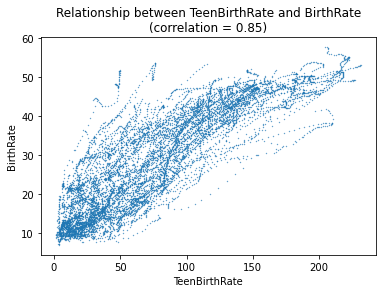

<Figure size 1080x1080 with 0 Axes>

In [72]:
initial_visualisation("TeenBirthRate", "BirthRate")

It is at this point that I saw a flaw in my use of Pearson's correlation coefficient to understand the data. Pearson's coefficient shows how close to a linear representation the data is. Looking at my visualisations, I was surprised that the data relating to the GDP was so tightly packed but with a coefficient of only 0.5 while the birth rate data was so spread with a coefficient of 0.85. It makes me wonder if there's other relationships of interest which I ignored for not being linear enough. However, due to the limited scope of my project, I'll be focusing on the factors I already have identified.  

Edit: Due to time and effort constraints, I will be looking at 

- the relationship between **GDP** and **teen birth rate**
- if **life expectancy** has improved over time
- some "fun" anomalies

---

# Next step: answering questions

## Question: Is there a relationship between the GDP per capita and teen birth rate?

#### Take a slice of the dataframe so it only shows the relevant columns

- Country
- Year
- GDP
- Adolescent Birth Rate

In [29]:
GDP_teen_df = selected_data_df[["CountryName", "Year", "GDP", "TeenBirthRate"]]
GDP_teen_df.head()

,CountryName,Year,GDP,TeenBirthRate
0,Caribbean small states,1960,457.464712,162.871212
1,East Asia & Pacific (all income levels),1960,146.814138,66.015974
2,East Asia & Pacific (developing only),1960,89.319639,75.043631
3,Euro area,1960,924.571393,27.301838
4,Europe & Central Asia (all income levels),1960,648.223441,42.030052


#### Are there any nulls?

In [30]:
GDP_teen_df.isnull().any()

CountryName      False
Year             False
GDP              False
TeenBirthRate     True
dtype: bool

We will need to remove these before making a boxplot diagram

---

### Time to look at the correlation between GDP and teen birth rate

In [31]:
GDP_teen_df.corr()

,Year,GDP,TeenBirthRate
Year,1.000000,0.325817,-0.368044
GDP,0.325817,1.000000,-0.459438
TeenBirthRate,-0.368044,-0.459438,1.000000


GDP is generally increasing over time (+0.33 correlation)

Teen birth rate is generally decreasing over time (-0.36 correlation)

Teen birth rate decreases even more as GDP increases (-0.46 correlation)

---

##### Initial visualisations

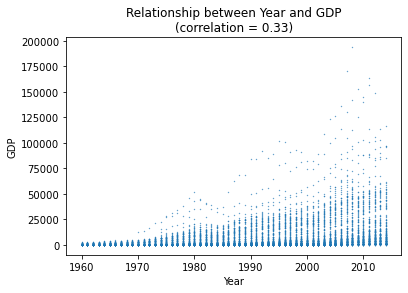

<Figure size 1080x1080 with 0 Axes>

In [73]:
initial_visualisation("Year", "GDP")

It's clear that there is an upward trend but there looks like there's a lot of countries that continue to have a GDP but it's unclear how many there are. A box and whiskers diagram could bring more clarity about the distribution of this data

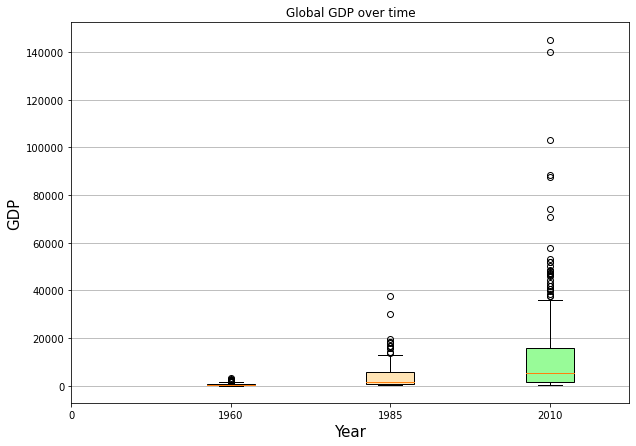

In [33]:
factor = "GDP"

data_1960 = GDP_teen_df[GDP_teen_df["Year"] == 1960]
data_1985 = GDP_teen_df[GDP_teen_df["Year"] == 1985]
data_2010 = GDP_teen_df[GDP_teen_df["Year"] == 2010]

# Concatenate the three arrays
GDP_graph_data = [data_1960[factor], data_1985[factor], data_2010[factor]]

# Make a box plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
bplot = axes.boxplot(GDP_graph_data, vert=True, patch_artist=True)   # colour
colors = ['mistyrose', 'moccasin', 'palegreen']

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

axes.yaxis.grid(True)
axes.set_xticks([y for y in range(len(GDP_graph_data))], )
axes.set_xlabel('Year',fontsize=15)
axes.set_ylabel(factor,fontsize=15)
    
# Xtick labels
plt.setp(axes, xticks=[y for y in range(len(GDP_graph_data))]+[3], xticklabels=["0", '1960', '1985', '2010'])

plt.title(f'Global {factor} over time')
plt.show()
fig.savefig("vis_boxplot.png")

This is a difficult factor to visualise because the difference between low GDP and high GDP is so astronomic. Nethertheless, the median is slowly increasing while the outliers are exploding

---

#### Teen birth rate over time

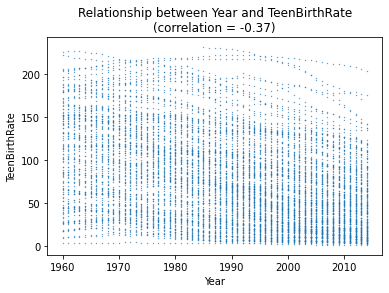

<Figure size 1080x1080 with 0 Axes>

In [75]:
initial_visualisation("Year", "TeenBirthRate")

The scatter graph is confusing to read. It's hard to tell the overall trend. One solution would be to look at the mean to determine if it's increasing or decreasing overall. This would give more information year on year. Another option would be a box plot diagram showing information from the beginning, middle and end of our dataset.

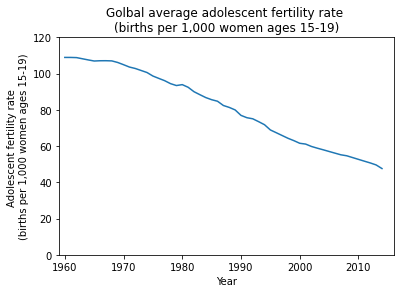

In [35]:
GDP_teen_df[["TeenBirthRate", "Year"]].groupby("Year").mean()
plt.plot(GDP_teen_df[["TeenBirthRate", "Year"]].groupby("Year").mean())
plt.ylabel("Adolescent fertility rate \n(births per 1,000 women ages 15-19)")
plt.xlabel("Year")
plt.title("Golbal average adolescent fertility rate \n(births per 1,000 women ages 15-19)")
plt.axis([1959, 2016,0,120])
plt.show()

The average fertility rate for adolescents 15-19 years old is decreasing quite smoothly year on year

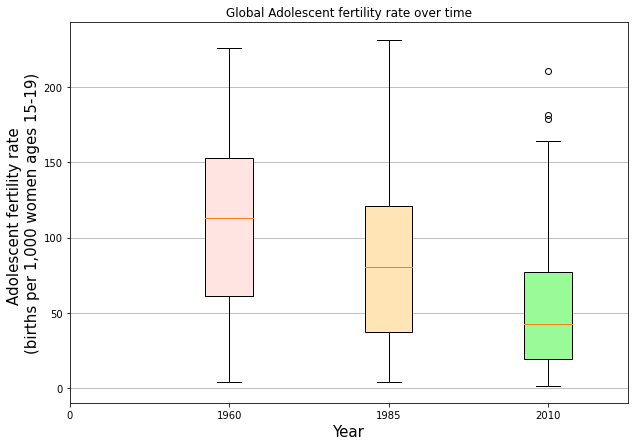

In [36]:
factor = "TeenBirthRate"

# The dataframe currently has ~450 entries with no value. We will filter these out below
temp_df = pd.DataFrame(selected_data_df)
NaN_filter = temp_df[factor].isnull()
temp_df = temp_df[~NaN_filter] # filters the dataframe according to everything that ISN'T in the NaN filter

data_1960 = temp_df[temp_df["Year"] == 1960]
data_1985 = temp_df[temp_df["Year"] == 1985]
data_2010 = temp_df[temp_df["Year"] == 2010]

# Concatenate the three arrays
graph_data = [data_1960[factor], data_1985[factor], data_2010[factor]]

# Make a box plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
bplot = axes.boxplot(graph_data, vert=True, patch_artist=True)   # colour
colors = ['mistyrose', 'moccasin', 'palegreen']

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

axes.yaxis.grid(True)
axes.set_xticks([y for y in range(len(graph_data))], )
axes.set_xlabel('Year',fontsize=15)
axes.set_ylabel("Adolescent fertility rate \n(births per 1,000 women ages 15-19)",fontsize=15)
    
# Xtick labels
plt.setp(axes, xticks=[y for y in range(len(graph_data))]+[3], xticklabels=["0", '1960', '1985', '2010'])

plt.title('Global Adolescent fertility rate over time')
plt.show()
fig.savefig("vis_boxplot.png")

This clearly shows that the trend is that teenage birth rates are decreasing over time. The median decreased between each 25 year apart slice and even the range is smaller over time, with a few outliers.

With the GDP increasing over time and teen births decreasing over time, we could hypothesise that these factors might be linked

---

#### Comparing GDP and adolescent birth rates directly

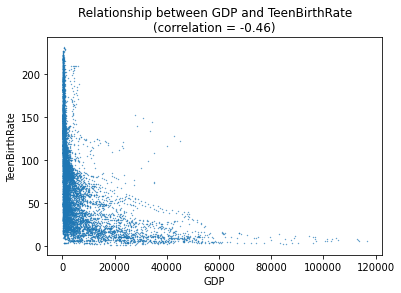

<Figure size 1080x1080 with 0 Axes>

In [76]:
initial_visualisation("GDP", "TeenBirthRate")

There seems to be a sharp cutoff where a higher GDP correlates with a much lower teenage birth rate. It should be noted that this chart shows all the historical data at once. We should compare to similar charts depicting just 1960 and just 2010

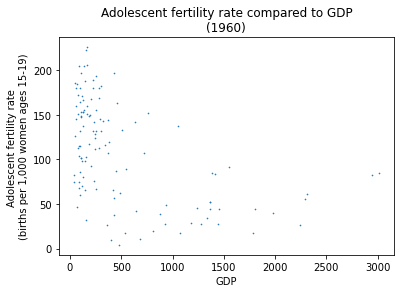

<Figure size 1080x1080 with 0 Axes>

In [38]:
year = 1960
year_filter = GDP_teen_df["Year"] == year
year_1960_df = GDP_teen_df[year_filter]

GDP = year_1960_df['GDP'].values
teen_BR = year_1960_df['TeenBirthRate'].values

plt.scatter(GDP, teen_BR, s=0.4)
plt.xlabel('GDP')
plt.ylabel("Adolescent fertility rate \n(births per 1,000 women ages 15-19)")
plt.title(f'Adolescent fertility rate compared to GDP\n({year})')
plt.figure(figsize=(15,15))
plt.show()
print()

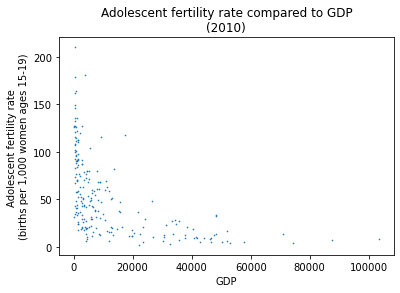

<Figure size 1080x1080 with 0 Axes>

In [39]:
year = 2010
year_filter = GDP_teen_df["Year"] == year
year_2010_df = GDP_teen_df[year_filter]

GDP = year_2010_df['GDP'].values
teen_BR = year_2010_df['TeenBirthRate'].values

plt.scatter(GDP, teen_BR, s=0.4)
plt.xlabel('GDP')
plt.ylabel("Adolescent fertility rate \n(births per 1,000 women ages 15-19)")
plt.title(f'Adolescent fertility rate compared to GDP\n({year})')
plt.figure(figsize=(15,15))
plt.show()
print()

It is important to note that the y-axis of both graphs is identical but the x-axis is so wildly different that it's difficult to compare the values directly. On the chart showing all the data across the 50 years, the entirety of the 1960 graph would be within the 0-3000 GDP section, making it difficult to draw conclusions because even the richest country then would be incredibly poor by today's standards.

A better solution might be to look at the most recent decade's worth of data

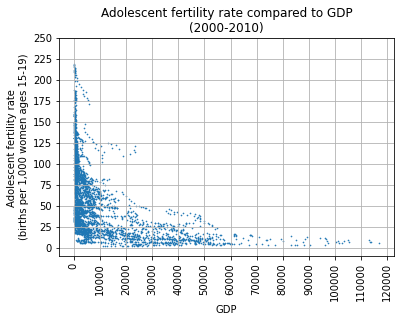

<Figure size 1440x1440 with 0 Axes>

In [40]:
year = 2000
year_filter = GDP_teen_df["Year"] >= year
year_2000s_df = GDP_teen_df[year_filter]

GDP = year_2000s_df['GDP'].values
teen_BR = year_2000s_df['TeenBirthRate'].values

plt.scatter(GDP, teen_BR, s=0.4)
plt.xlabel('GDP')
plt.ylabel("Adolescent fertility rate \n(births per 1,000 women ages 15-19)")
plt.title(f'Adolescent fertility rate compared to GDP\n(2000-2010)')
plt.grid()
plt.yticks(np.arange(0,251,25))
plt.xticks(np.arange(0,120001,10000), rotation=90)
plt.figure(figsize=(20,20))
plt.show()
print()

It's not incredibly statistical but from reading the graph it seems like after a country reaches a per capita GDP of 10,000, the rate of adolscent births drops dramatically. By 50,000 it drops even further. At that point, increases in GDP don't do much to affect the birth rate. This is roughly in keeping with what we saw from the initial graph covering all the years, but it's good to double check.

---

---

<h1 style="font-size:2em;color:#2467C0"> Question: Has life expectancy improved over time? <\h1>

Write a function to graph life expectancy for a specific country

In [41]:
def country_life_expectancy(country):
    
    # make a dataframe just for that country's information
    filter1 = LE_filtered_df['CountryName'].str.contains(country)
    LE_df = LE_filtered_df[filter1]

    # get the years that there is data for
    years = LE_df['Year'].values
    # get the life expectancy for those years
    life_expectancy = LE_df['LifeExpectancy'].values

    # create a chart
    plt.plot(years, life_expectancy)
    plt.xlabel('Year')
    plt.ylabel("Life expectancy at birth, total (years)")
    plt.title(f'Life Expectancy in {country}')
    plt.axis([1959, 2016,15,85])
    plt.show()
    print()

### Making a scatter chart showing overall life expectancy over time

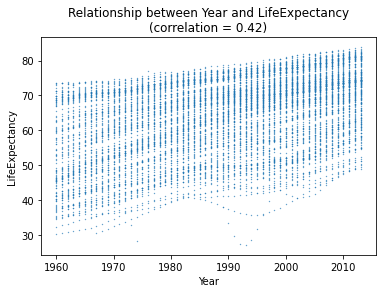

<Figure size 1080x1080 with 0 Axes>

In [77]:
initial_visualisation("Year", "LifeExpectancy")

It generally looks like it's increasing but it's messy and a little hard to read

There is a moderate positive correlation (0.42) between year and life expectancy

---

### Question: Which countries were so anomalous?
- life expectancy of <30 around the year 1975
- life expectancy of ~30 around the year 1993
- life expectancy of ~30 around 1978
- life expectancy of ~37 in 1995

#### 1) Find a country with a life expectancy of **below 30** around **1975** and **1990**

In [87]:
year_filter = LE_filtered_df['Year'] > 1970
age_filter = LE_filtered_df['LifeExpectancy'] < 30

question_df = LE_filtered_df[year_filter & age_filter]
question_df
# Expand for full data showing the relevant years

,CountryName,Year,LifeExpectancy
585847,Cambodia,1974,28.258488
656561,Cambodia,1975,23.884537
729252,Cambodia,1976,20.656512
803241,Cambodia,1977,19.265512
878850,Cambodia,1978,20.064927
954617,Cambodia,1979,23.029098
1032003,Cambodia,1980,27.738976
2089005,Rwanda,1991,29.745829
2209528,Rwanda,1992,27.483659
2332668,Rwanda,1993,27.078902


In [46]:
# Shows the lowest value for each country that appears in our filter
question_df.groupby("CountryName").min()

,Year,GDP,LifeExpectancy,TeenBirthRate,BirthRate,PopulationDensity
CountryName,,,,,,
Cambodia,1974,77.820199,28.258488,85.6196,40.779,42.836976
Rwanda,1991,125.690127,27.078902,56.2852,44.003,243.047710


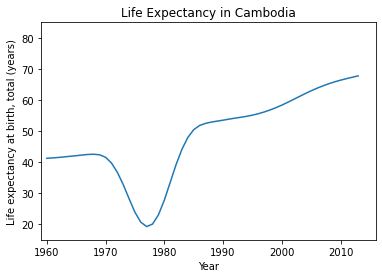

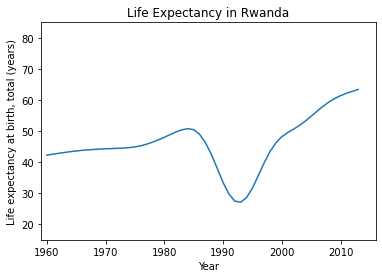

In [47]:
country_life_expectancy("Cambodia") # had to change the scale to accommodate the <20 life expectancy :()
country_life_expectancy("Rwanda")

---
#### 2) Find a country with a life expectancy of **~30** around the year **1978**

In [88]:
year_filter = LE_filtered_df['Year'] > 1973
year_filter2 = LE_filtered_df['Year'] < 1981
age_filter = LE_filtered_df['LifeExpectancy'] < 35
age_filter2 = LE_filtered_df['LifeExpectancy'] > 30

question_df = LE_filtered_df[year_filter & year_filter2 & age_filter & age_filter2]
question_df

# Expand for full data showing the relevant years

,CountryName,Year,LifeExpectancy
777641,Timor-Leste,1976,33.727341
853288,Timor-Leste,1977,32.840268
928906,Timor-Leste,1978,32.641732
1004749,Timor-Leste,1979,33.188122
1085795,Timor-Leste,1980,34.425951


In [89]:
# Shows the lowest value for each country that appears in our filter
question_df.groupby("CountryName").min()

,Year,LifeExpectancy
CountryName,,
Timor-Leste,1976,32.641732


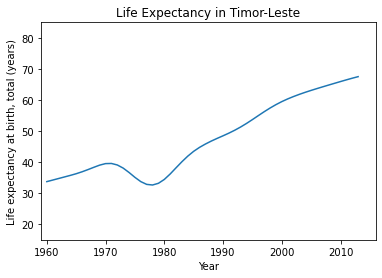

In [86]:
country_life_expectancy("Timor-Leste")

---
#### 3) Find a country with a life expectancy of **~37** around the year **1995**

In [90]:
year_filter = LE_filtered_df['Year'] > 1985
year_filter2 = LE_filtered_df['Year'] < 2005
age_filter = LE_filtered_df['LifeExpectancy'] < 40
age_filter2 = LE_filtered_df['LifeExpectancy'] > 35

question_df = LE_filtered_df[year_filter & year_filter2 & age_filter & age_filter2]
question_df
# Expand for full data showing the relevant years

,CountryName,Year,LifeExpectancy
1592807,Sierra Leone,1986,39.886268
1681942,Sierra Leone,1987,39.330659
1771270,Sierra Leone,1988,38.694073
1860626,Rwanda,1989,38.041805
1863413,Sierra Leone,1989,38.018585
1976081,Sierra Leone,1990,37.353415
2092329,Sierra Leone,1991,36.748341
2212937,Sierra Leone,1992,36.246585
2335946,Sierra Leone,1993,35.885756
2461297,Sierra Leone,1994,35.701390


In [91]:
# Shows the lowest value for each country that appears in our filter
question_df.groupby("CountryName").min()

,Year,LifeExpectancy
CountryName,,
Rwanda,1989,35.659195
Sierra Leone,1986,35.701390


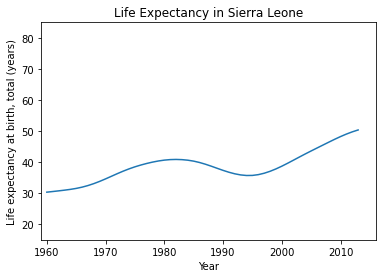

In [53]:
country_life_expectancy("Sierra Leone")

#### Question: Which countries were so anomalous? And why?
- life expectancy of <30 around the year 1975
    - [x] **Cambodia**: 1974 - 1980
    
      *Cambodia experienced a genocide from 1975 to 1979*
- life expectancy of ~30 around the year 1993
    - [x] **Rwanda**: 1991 - 1994
    
      *Rwanda had a civil war starting in 1990, resulting in a genocide in 1994*
- life expectancy of ~30 around 1978
    - [x] **Timor-Leste**: 1976 - 1980
    
      *In late 1975, it was invaded and occupied by Indonesia's military in a highly violent, decades long conflict*
- life expectancy of ~37 in 1995
    - [x] **Sierra Leone**: 1986 - 2005
    
      *In 1991, a brutal civil war began*



---

### Question reminder: Has life expectancy improved over time?

Our previous graph was too cluttered and made it difficult to see what was going on. To simplify, we will look at three slices of time from the start, middle and end of our data, 25 years apart.

In [55]:
data_1960 = selected_data_df[selected_data_df["Year"] == 1960]
data_1985 = selected_data_df[selected_data_df["Year"] == 1985]
data_2010 = selected_data_df[selected_data_df["Year"] == 2010]

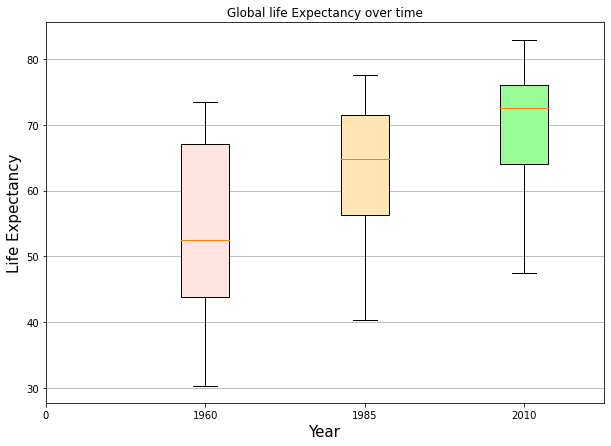

In [56]:
# Concatenate the three arrays
graph_data = [data_1960["LifeExpectancy"].dropna(), data_1985["LifeExpectancy"].dropna(), data_2010["LifeExpectancy"].dropna()]

# Make a box plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
bplot = axes.boxplot(graph_data, vert=True, patch_artist=True)   # colour
colors = ['mistyrose', 'moccasin', 'palegreen']

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

axes.yaxis.grid(True)
axes.set_xticks([y for y in range(len(graph_data))], )
axes.set_xlabel('Year',fontsize=15)
axes.set_ylabel('Life Expectancy',fontsize=15)
    
# Xtick labels
plt.setp(axes, xticks=[y for y in range(len(graph_data))]+[3], xticklabels=["0", '1960', '1985', '2010'])

plt.title('Global life Expectancy over time')
plt.show()
# fig.savefig("vis_boxplot.png")

**Summary**: It is clear that life expectancy is generally increasing. The median very clearly increases over time and the spread of the data is decreasing. We have calculated the correlation (0.43) which shows that there is a moderate positive correlation, indicating that life expectancy is indeed improving over time.

---

---



# Misc outliers

I didn't have the energy to do everything in depth so here are some bonus facts!

##### Which country has the highest GDP?

In [57]:
GDP_filter = selected_data_df['GDP'] > selected_data_df['GDP'].max()*0.35

question_df = selected_data_df[GDP_filter]
question_df[["CountryName", "GDP"]].groupby("CountryName").max()

,GDP
CountryName,
Bermuda,93605.748165
Channel Islands,73568.234828
Iceland,68344.560158
Liechtenstein,157092.969387
Luxembourg,116664.262488
"Macao SAR, China",96038.050724
Monaco,193648.132213
Norway,102832.258690
Qatar,96732.402545


I played around with numbers and it turns out there's only 10 countries with over 35% of the max GDP for any country on the planet (Monaco - 193,648 per capita (current US$))

Also there countries seem strangely familiar. Are they tax havens by any chance?

---
##### Which countries are most cropland as a % of total land area?

In [94]:
crop_indicator = wanted_indicators[4] # Cropland
crop_filter = data['IndicatorName'].str.contains(crop_indicator)
crop_filter_percent = data['Value'] > 45
crop_filtered_df = data[crop_filter & crop_filter_percent]
crop_filtered_df[["CountryName", "Value"]].groupby("CountryName").max()

,Value
CountryName,
Kiribati,50.617284
Sao Tome and Principe,46.875000
Tuvalu,66.666667


That's a lot of cropland

---
#### Where is the highest life expectancy? 

In [59]:
LE_filter = selected_data_df['LifeExpectancy'] >83

question_df = selected_data_df[LE_filter]
question_df.groupby("CountryName").max()

,Year,GDP,LifeExpectancy,TeenBirthRate,BirthRate,PopulationDensity
CountryName,,,,,,
"Hong Kong SAR, China",2013,38364.194901,83.831707,3.515,13.5,6845.238095
Iceland,2013,47493.249038,83.117073,7.307,13.4,3.229566
Japan,2013,46679.265432,83.331951,4.534,8.2,349.905335


After the depressing tax haven countries, here's a bunch of countries where life expectancy is pretty great. It includes the UK!

In [60]:
LE_filter = selected_data_df['LifeExpectancy'] >80

question_df = selected_data_df[LE_filter]
question_df.groupby("CountryName").max()

,Year,GDP,LifeExpectancy,TeenBirthRate,BirthRate,PopulationDensity
CountryName,,,,,,
Australia,2013,67646.103853,82.197561,17.100000,14.100000,3.010279
Austria,2013,51386.376651,80.982927,11.126000,9.400000,102.741697
Belgium,2013,47699.807052,80.585366,9.564000,11.900000,369.313639
Bermuda,2013,85973.158416,81.677805,NaN,10.400000,1300.020000
Canada,2013,52733.473689,81.401122,14.217200,11.300000,3.866307
Chile,2013,15741.711658,81.197927,50.666000,13.959000,23.638301
Denmark,2013,59818.631528,80.302439,4.436000,10.400000,132.334009
Euro area,2013,42211.208415,81.373197,10.292505,10.551362,125.953668
European Union,2013,36244.439552,80.384262,12.653499,10.431019,119.525897


# THE END